# <center>UP3, Optimization for machine learning: practical session 1: determinist gradient descents </center>

This notebook contains the questions of the practical session along with complementary guidelines and examples. The code is written in Python. The questions are in red.

First import all given code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

from gradient_descent import gradient_descent
from optim_utilities import print_rec
from test_functions import (
    linear_function,
    ackley,
    sphere,
    quadratic,
    rosen,
    L1norm,
    sphereL1,
    rastrigin,
    michalewicz,
    schwefel
)
from restarted_gradient_descent import restarted_gradient_descent
from random_search import random_opt  # always useful to compare optim algos to a random search

# auto reload to reload functions imported that have been changed (cf. test_functions.sphereL1 for lbda)
%load_ext autoreload
%autoreload 2

## Code demo

Seat and relax, we will show you how to use the code for optimizing functions.
First plot examples of 2D functions, which are given in `test_functions.py`

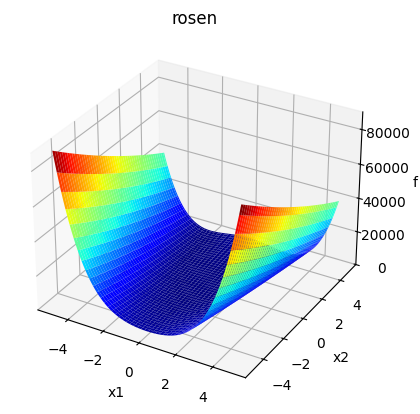

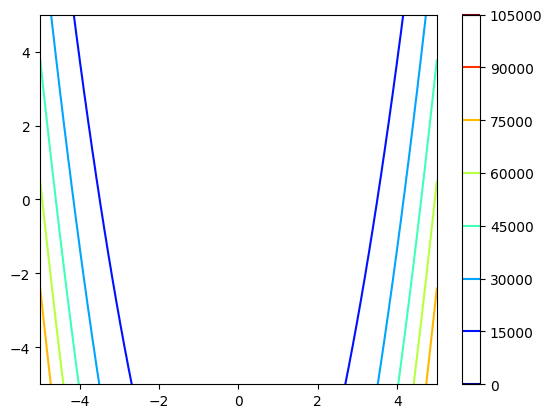

In [26]:
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = rosen # many other possible functions : cf. test_functions.py

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 

x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.set_zlim(np.min(z)-0.1,np.max(z)+0.1)
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z,cmap='jet')
plt.colorbar()
plt.show()
# figure.savefig('plot.pdf')

Now carry out some optimizations.  

Some explanations about results format parameters :  

printlevel : int, controls how much is recorded during optimization.  
       &emsp; = 0 for minimum recording (best point found and its obj function value)  
       &emsp; > 0 records history of best points  
       &emsp; > 1 records the entire history of points (memory consuming)    
        
The optimization results are dictionaries with the following key-value pairs:  
       &emsp; "f_best", float : best ojective function found during the search  
       &emsp; "x_best", 1D array : best point found   
       &emsp; "stop_condition" : str describing why the search stopped  
       &emsp; "time_used" , int : time actually used by search (may be smaller than max budget)  
       &emsp; if printlevel > 0 :  
          &emsp;&emsp;  "hist_f_best", list(float) : history of best so far objective functions  
           &emsp;&emsp; "hist_time_best", list(int) : times of recordings of new best so far  
           &emsp;&emsp; "hist_x_best", 2D array : history of best so far points as a matrix, each x is a row  
        &emsp;if printlevel > 1 :  
       &emsp;&emsp; "hist_f", list(float) : all f's calculated  
       &emsp;&emsp; "hist_x", 2D array : all x's calculated  
       &emsp;&emsp; "hist_time", list(int) : times of recording of full history  



search stopped after 879 evaluations of f because of too small step 
best objective function = 4.729320977488239e-10
best x = [0.99997891 0.99995729]


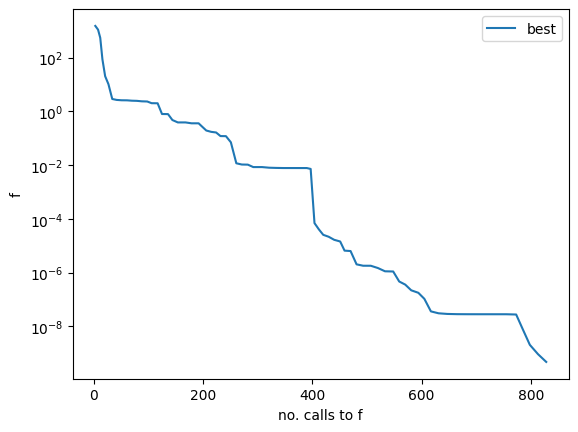

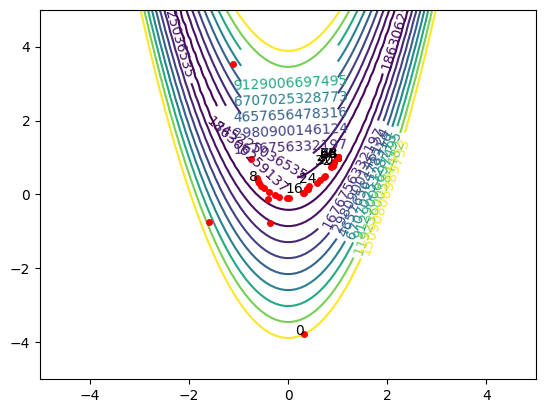

In [38]:
#########################
# function definition
fun = rosen
dim = 2
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 100000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
#res = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=0.001,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)

#########################
# reporting
print_rec(res=res, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)

### <span style="color:red">Question 1: local vs. global search</span>

Change the following features of the above code to observe the difference between local and global optimizations : 
1. Set the dimension of the problem to 2 (so as to observe points in the `x`-space), and select alternatively `ackley` and `quadratic` as objective functions 
2. Set the initial point of the search `start_x` somewhere between the bounds `LB` and `UB`
3. Compare the pure gradient descent ( `step_factor=0.01,direction_type="gradient",do_linesearch=False` ) with the random optimization. You can play with the `step_factor` and the `budget`.


### <span style="color:red">Answer 1: local vs. global search</span>
your turn

search stopped after 1500 evaluations of f because of budget exhausted 
best objective function = 574.8092459961655
best x = [-0.43729401 -2.20197982]


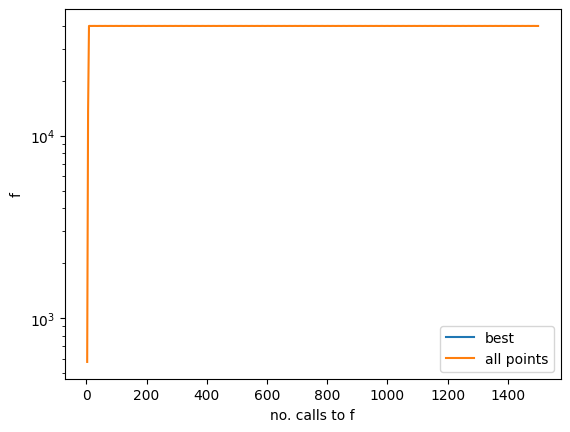

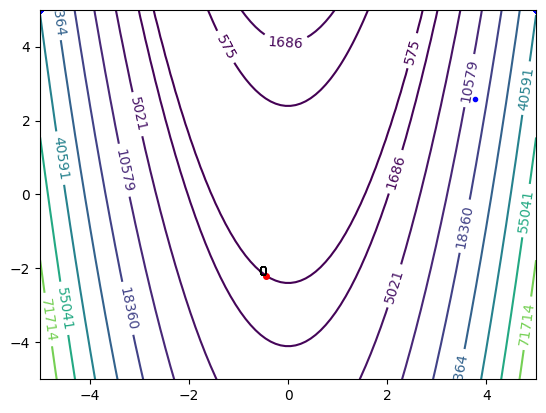

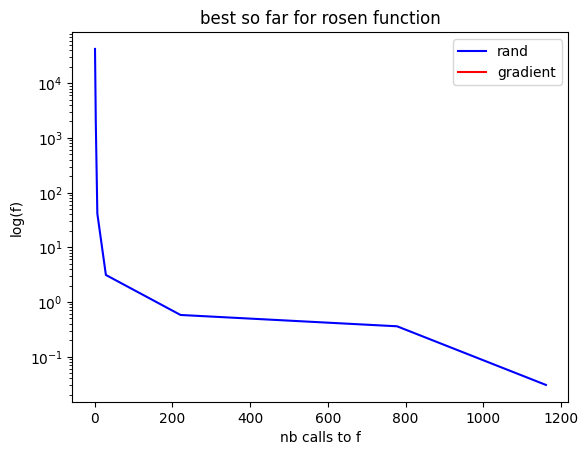

In [15]:
# your code here

########### CORRECTION #####################

#########################
# function definition
fun = rosen   # repeat this operation with the quadratic and ackley 
dim = 2
LB = [-5] * dim
UB = [5] * dim
# np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)

budget = 500*(dim+1)
printlevel = 2  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize

res_rand = random_opt(func=fun, LB=LB, UB=UB, budget=budget, printlevel=printlevel)
res_grad = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=0.01,direction_type="momentum",
                       do_linesearch=False,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)

#########################
# reporting
#print_rec(res=res_rand, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)
print_rec(res=res_grad, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)
# both convergences on one plot
plt.plot(res_rand["hist_time_best"],res_rand["hist_f_best"],color="blue",label="rand")
plt.plot(res_grad["hist_time_best"],res_grad["hist_f_best"],color="red",label="gradient")
plt.yscale("log")
plt.xlabel('nb calls to f')
plt.ylabel('log(f)')
plt.title(f'best so far for {fun.__name__} function')
plt.legend()
#plt.savefig('conv_comparison.pdf', format='pdf', dpi=300)
plt.show()
########### END CORRECTION #####################

### <span style="color:red">Question 2: gradient vs. momentum vs. NAG</span>

Compare the influence of the directions gradient, momentum and NAG on a quadratic function in relatively high (50) dimensions. 


### <span style="color:red">Answer 2: gradient vs. momentum vs. NAG directions</span>
your analysis

fbest grad=9.856413328661367e-12, mom=2.8315396360134143e-10, NAG=1.593854452733279e-11


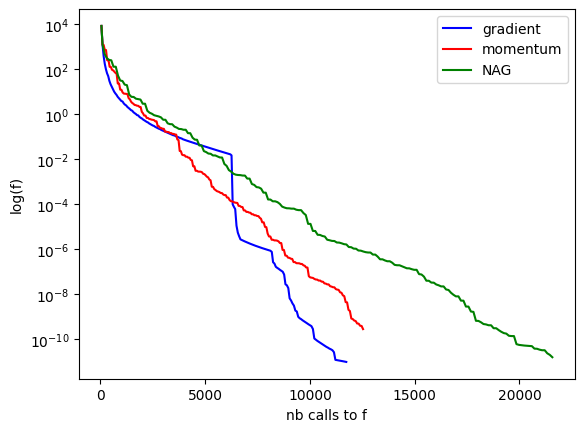

In [14]:
# your code here

########### CORRECTION #####################
# Based on experiments on the quadratic function, D=50, condition number of Hessian=50, and Rosenbrock function, D=2.
# * Momentum is a clear improvement over gradient, especially without line search.
# * With line search, gradient remains a very good algorithm.
# * Hard to find cases where NAG is better than momentum. NAG is best choice with Rosenbrock (rosen) function dim=2. 
#    Best also for quadratic, D=10, cond=100, step_factor=0.01. Open question to know clearly when it is better.
# * On Rosenbrock, the relative performance of the different directions depends on the starting point.

#########################
# function definition
fun = quadratic   # play with condition number of quadratic function in test_functions.py
dim = 50
LB = [-5] * dim
UB = [5] * dim
#np.random.seed(111) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
# start_x = np.array([3,2,1,-4.5,4.6,-2,-1,4.9,0,2])
# start_x = (1+np.arange(dim))*5/dim
# start_x = np.array([2.3,4.5])
start_x = np.random.uniform(low=LB,high=UB)
alpha = 0.01
lsearch = True
budget = 1000*(dim+1)
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming
#########################
# optimize
res_grad = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=alpha,direction_type="gradient",
                       do_linesearch=lsearch,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
res_mom = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=alpha,direction_type="momentum",
                       do_linesearch=lsearch,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
res_nag = gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,
                       step_factor=alpha,direction_type="NAG",
                       do_linesearch=lsearch,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
#########################
# reporting
# print_rec(res=res_grad, fun=fun, dim=dim, LB=LB, UB=UB , printlevel=printlevel, logscale = True)
# all convergences on one plot
print(f'fbest grad={res_grad["f_best"]}, mom={res_mom["f_best"]}, NAG={res_nag["f_best"]}')
plt.plot(res_grad["hist_time_best"],res_grad["hist_f_best"],color="blue",label="gradient")
plt.plot(res_mom["hist_time_best"],res_mom["hist_f_best"],color="red",label="momentum")
plt.plot(res_nag["hist_time_best"],res_nag["hist_f_best"],color="green",label="NAG")
plt.yscale("log")
plt.xlabel('nb calls to f')
plt.ylabel('log(f)')
# plt.title(f'best so far for {fun.__name__} function in {dim}D')
plt.legend()
#plt.savefig('conv_comparison.pdf', format='pdf', dpi=300)
plt.show()
########### END CORRECTION #####################

## A first step towards ML: regularized quadratic loss

Let us consider the following test function which is associated to machine learning :

$$ f(x) = \sum_{i=1}^D (x_i - c_i)^2 + \lambda \sum_{i=1}^D \lvert x_i\rvert \quad,\quad \lambda \ge 0 $$
$$ c_i = i \quad \text{ and } \quad -5 = LB_i \le x_i \le UB_i = 5 \quad,\quad i=1,\ldots,D $$  

* First term: sphere function centered at $c$. A simplistic model to the mean square error of a NN where $x$ minimizes the training error.
* Second term: L1 norm times $\lambda$. The $x_i$'s would be the weights of a NN.
This term helps in improving the test error.

The function is already coded in `test_functions.py` as `sphereL1`. $\lambda$ is set in the function (open the file in your preferred Python editor).





Let us first plot the function in 2 dimensions:

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


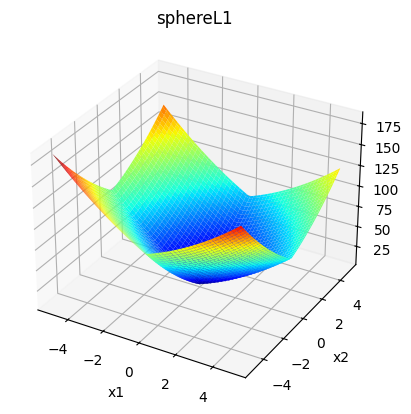

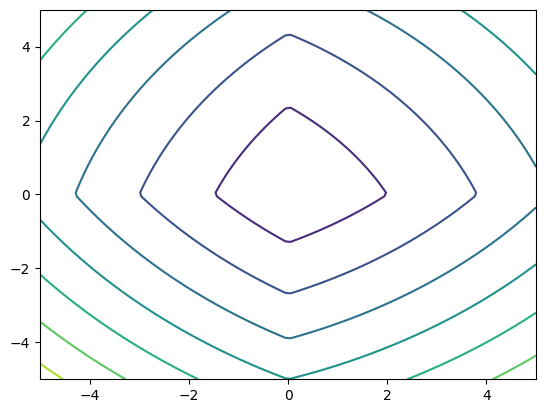

In [6]:
%load_ext autoreload
%autoreload 2
# function definition
dim = 2
LB = [-5,-5]
UB = [5,5]
fun = sphereL1

  
# start drawing the function (necessarily dim==2)
no_grid = 100
# 
# execute " %matplotlib qt5 " in the spyder console for interactive 3D plots 
# " %matplotlib inline " will get back to normal docking
x1 = np.linspace(start=LB[0], stop=UB[0],num=no_grid)
x2 = np.linspace(start=LB[1], stop=UB[1],num=no_grid)
x, y = np.meshgrid(x1, x2)
xy = np.array([x,y])
z = np.apply_along_axis(fun,0,xy)
figure = plt.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, z, cmap='jet', shade= "false")
plt.xlabel(xlabel="x1")
plt.ylabel(ylabel="x2")
plt.title(label=fun.__name__)
axis.set_zlabel("f")
plt.show()
plt.contour(x,y,z)
plt.show()


### <span style="color:red">Question 3 : optimizing the `sphereL1` function</span> 

You will optimize the `sphereL1` function for various values of $\lambda$, $\lambda = \{0.001,0.1,1,5,10\}$ in `dim=10` dimensions.

To do this, make sure that the function is described as follows  
```
# function definition
fun = sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim
```

Also, to make the results of the search more robust, use the `restarted_gradient_descent` function (cf. `restarted_gradient_descent.py` file).

Repeat optimizations for varying $\lambda$'s (parameter `lbda` dans `test_functions.sphereL1`)
3.1. What do you notice ? 
3.2. Assuming the $x$'s are weights of a neural network, what would be the effect of $\lambda$ on the network ?

Note : when changing `lbda`, it is important to restart the kernel or, to make it automatic, the following lines of code have been added at the top of the notebook.
```
%load_ext autoreload
%autoreload 2
```

### <span style="color:red">Answer 3: optimizing the `sphereL1` function</span>
your analysis

search stopped after 14866 evaluations of f because of too small step 
best objective function = 330.398744091543
best x = [-3.39581235e-06  2.24258813e-03 -5.16502335e-07  4.68240541e-02
  1.43228353e-01  1.00049621e+00  1.63353553e+00  2.63315056e+00
  3.99867466e+00  4.99831602e+00]


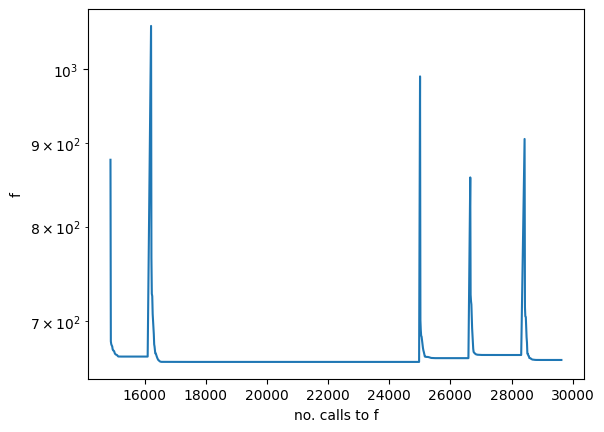

In [7]:
# your code here

####### CORRECTION
#########################
# function definition
fun = sphereL1
dim = 10
LB = [-5] * dim
UB = [5] * dim
np.random.seed(123) # useful for repeated runs (quadratic fct or initial random point)

#########################
# algorithms settings
start_x = np.random.uniform(low=LB,high=UB)
budget = 4000*(dim+1)
nb_restarts = 5
printlevel = 1  # =0,1,2 , careful with 2 which is memory consuming

#########################
# optimize
res = restarted_gradient_descent(func=fun,start_x=start_x, LB=LB,UB=UB,budget=budget,nb_restarts=nb_restarts,
                       step_factor=0.1,direction_type="momentum",
                       do_linesearch=True,min_step_size=1e-11,
                       min_grad_size=1e-6,inertia=0.9,printlevel=printlevel)
# reporting
print(f'search stopped after {res["time_used"]} evaluations of f because of {res["stop_condition"]}')
print("best objective function =",res["f_best"])
print("best x =", res["x_best"])
if printlevel > 0:
    fig1, ax1 = plt.subplots()
    plt.yscale("log")
    ax1.plot((res["hist_time_best"]+ [res["time_used"]]) , (res["hist_f_best"] + [res["f_best"]]))
    ax1.set_xlabel("no. calls to f")
    ax1.set_ylabel("f")
    if printlevel > 1:
        ax1.plot(res["hist_time"],res["hist_f"])


**CORRECTION (continued)**
Results : 
  
| lbda  | $x^\star$  | $f(x^\star)$  |  
| :---:  | :---:  | :----:  |  
|  0.01  |  $0.99, 1.99, 2.99, 3.99, 4.99, 5., 5., 5., 5., 5.$  |  55.40  |  
|  0.1  |  $0.95, 1.95, 2.95, 3.95, 4.95, 5., 5., 5., 5., 5.$  |  58.99  |  
|  1  |  $0.5, 1.5, 2.5, 3.5, 4.5, 5., 5., 5., 5., 5.$  |  93.75  |  
|  3  |  $0., 0.39, 1.46, 2.46, 3.56, 4.58, 5., 5., 5., 5.$  |  163.77  |  
|  6  |  $ 0., 0.01, 0.42, 1.33, 1.84, 3.16, 4.01, 4.63, 5., 5.$  |  250.48  |  
|  10  |  $ 0, 0, 0, 0.05, 0.14, 1.00, 1.63, 2.63, 4, 5.$  |  330.40  |  

__Question 3.1__ :  
    
As $\lambda$ increases, $x^\star$ moves away from $c$ and tends to 0. Some components of $x^\star$, those related to the low component values of $c$, are set to 0 faster than the others.  
This can be understood by looking at an optimization problem with a constraint on the L1 norm of $x$,
\begin{equation*}
\left\{
\begin{array}{l}
\min_x f(x) = \lVert x - c \rVert^2 \\
\text{tel que }~~ g(x) = \lVert x \rVert_1 - \tau \le 0 \quad,\quad \tau>0
\end{array}
\right.
\end{equation*}
The associated Lagrangian, to be minimized on $x$, is
\begin{equation*}
\min_x f(x) + \lambda^\star g(x) = \lVert x - c \rVert^2 + \lambda^\star \lVert x \rVert_1 - \lambda^\star\tau
\end{equation*}

The last term does not depend on $x$, and the 2 other terms are precisely those of the `sphereL1` function.
The drawing below shows the sphere function and the limit of the constraint on $\lVert x \rVert_1$. 
It is observed that the solution tends to be at a vertex of the feasible domain where components in $x$ cancel out.
This phenomenon becomes more visible when dimension increases.  

<img src="./l1sphere_regularization-crop.png" alt="L1regularization" width="300"/>

__Question 3.2__ :  

Analogy with machine learning : if the components of $x$ are neural net weights, neuron connexions are deleted when some $x_i$'s are zero. This will prevent the network from overfitting the data. Generalization will be better. An important choice is the value of $\lambda$.



## **End of this lab**